The goal of this project is to use machine learning to predict the disease progression of diabetes patients based on their body mass index (bmi). This is a supervised learning problem, since we have labeled data (the disease progression score) for each instance (the patient). Moreover, this is a regression problem, since the output is a continuous value (the score), rather than a discrete class (such as low, medium, or high risk). We will use the mean squared error (MSE) as the loss function, which measures the average squared difference between the actual and predicted scores. 


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [2]:
# Convert the data to a pandas dataframe
diabetes_df = pd.DataFrame(diabetes_X, columns=datasets.load_diabetes().feature_names)
diabetes_df['target'] = diabetes_y

# Get the summary statistics of the data
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [3]:
# Get the correlation matrix of the data
diabetes_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


From the above correlation matrix, it can be said that there is a high correlation between sex and age, also, the correlation between s1, i.e, total serum cholestrol and s2, i.e., low density lipoprotein is also high. It is worth noting that, there is a negative high correlation between s3(high-density lipoproteins) and s4 (total cholestrol/HDL)

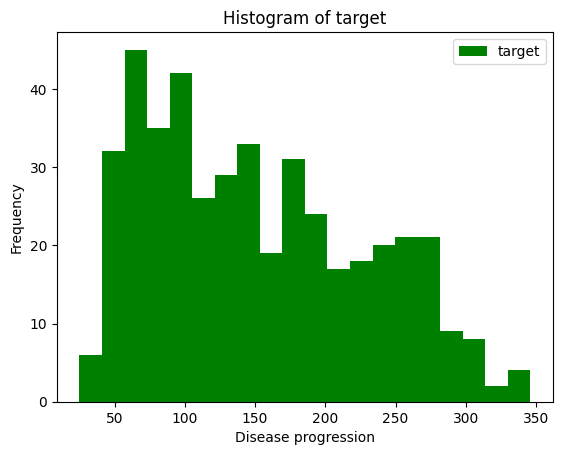

In [4]:
plt.hist(diabetes_df["target"], bins=20, color="green", label="target")
plt.xlabel("Disease progression")
plt.ylabel("Frequency")
plt.title("Histogram of target")
plt.legend()
plt.show()

This histogram shows the distribution of the disease progression target variable. This chart reveals that the target variable has a wide range of values, from 25 to 346, and a roughly normal distribution. The histogram can help us understand the variation and central tendency of the target variable.

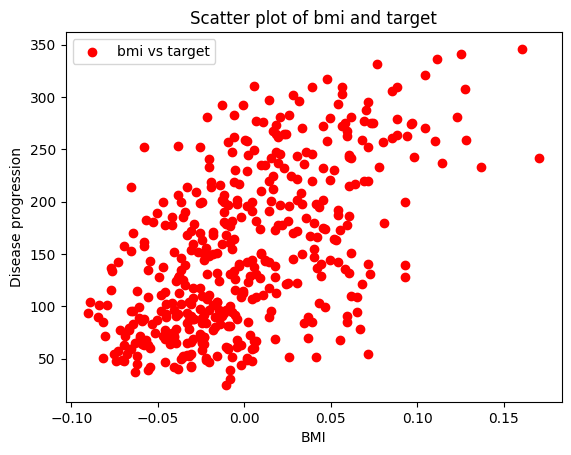

In [5]:
plt.scatter(diabetes_df["bmi"], diabetes_df["target"], color="red", marker="o", label="bmi vs target")
plt.xlabel("BMI")
plt.ylabel("Disease progression")
plt.title("Scatter plot of bmi and target")
plt.legend()
plt.show()

Above scatter plot shows the relationship between the bmi feature and the target variable. This chart reveals that the bmi feature has a positive linear relationship with the target variable, which means that higher bmi values are associated with higher disease progression values.

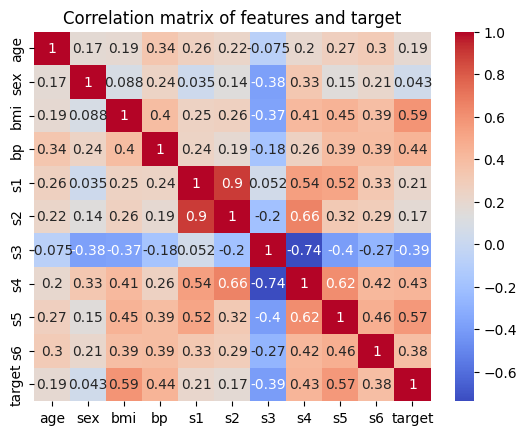

In [6]:
sns.heatmap(diabetes_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation matrix of features and target")
plt.show()

A correlation matrix that shows the correlation coefficients between each pair of features and the target variable. This chart reveals that some features have strong positive or negative correlations with the target variable. This was explained also deeply in code diabetes_df.corr() code where I explained notable correlations which are worth mentioning.


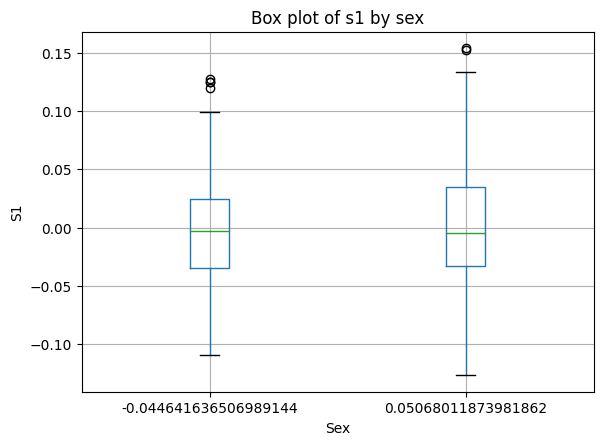

In [7]:
diabetes_df.boxplot(column="s1", by="sex")
plt.xlabel("Sex")
plt.ylabel("S1")
plt.title("Box plot of s1 by sex")
plt.suptitle("")
plt.show()

Above box plot shows the distribution of the s1 feature for different sex groups. This chart reveals that the s1 feature, which represents the total serum cholesterol, has some outliers and different medians for the male and female groups. 

In [17]:
# Extracting the BMI and Disease Progression columns from diabetes_df dataframe
bmi_independent_variable = diabetes_df[['bmi']]
disease_progression_dependent_variable  = diabetes_df['target']




So, now we are splitting the dataset into training and testing set. We are taking the test set size as 20% for this part of the model building process.   

In [18]:
bmi_independent_variable_train, bmi_independent_variable_test, disease_progression_dependent_variable_train, disease_progression_dependent_variable_test = train_test_split(bmi_independent_variable, disease_progression_dependent_variable, test_size=0.2, random_state=13)

In the next step, we will build a linear regression model on bmi and disease progression columns. The model will be build on training set that we created in above code.

In [19]:
# Training the model
LRmodel = LinearRegression()  
LRmodel.fit(bmi_independent_variable_train, disease_progression_dependent_variable_train)

LinearRegression()

In the next step, I will show some of the top 5 rows of the dependent and independent columns test set.

In [20]:
bmi_independent_variable_test.head()

,bmi
135,0.056307
358,-0.084886
194,-0.059019
399,0.022895
405,0.123131


In [21]:
disease_progression_dependent_variable_test.head()

135    272.0
358     90.0
194     86.0
399    232.0
405    281.0
Name: target, dtype: float64

After building the model, in the next step we will make predictions using the testing set, followed by finding out the coefficient and intercept of the model then calculating mean squared error.

In [22]:
disease_progression_dependent_variable_pred = LRmodel.predict(bmi_independent_variable_test)

In [23]:
#Calculating CO-efficient of the model
print('Coefficient of the model: \n', LRmodel.coef_)

Coefficient of the model: 
 [1010.13363095]


In [24]:
print('intercept of the model:', LRmodel.intercept_)

intercept of the model: 150.32635296240312


In [27]:
# Calculating the mean squared error
print('Mean squared error for test set: %.2f' % metrics.mean_squared_error(disease_progression_dependent_variable_test, disease_progression_dependent_variable_pred))

Mean squared error for test set: 4104.29


The slope is 1010.13, intercept is 150.32 and the model's equation is :
y = 1010.13x + 150.33



In [26]:
# Calculating the mean squared error for the train set
print('Mean squared error for the train set: %.2f' % metrics.mean_squared_error(disease_progression_dependent_variable_train, LRmodel.predict(bmi_independent_variable_train)))


Mean squared error for the train set: 3851.07


The MSE for the train set measures how well the model fits the data that it was trained on. Lower values indicate better fit. These values indicate that our model has a high mean squared error (MSE) on both the test and train sets. The MSE is a measure of how close the predictions are to the actual values. It is the average of the squared differences between the predictions and the actual values. Lower values indicate better fit. A high MSE means that our model is not very accurate and has a large prediction error. In the below code, we are creating a graph of model

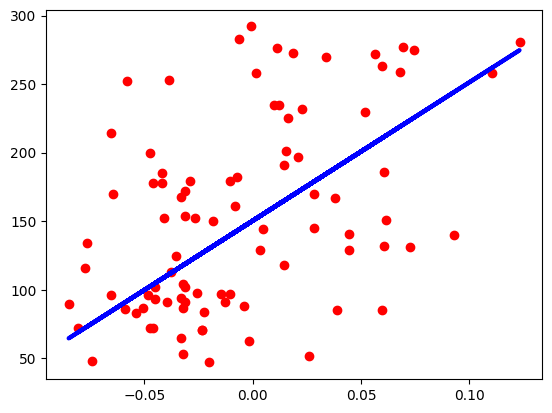

In [29]:

plt.scatter(bmi_independent_variable_test, disease_progression_dependent_variable_test,  color='red')
plt.plot(bmi_independent_variable_test, disease_progression_dependent_variable_pred, color='blue', linewidth=3)

plt.show()

Based on above calculations, it can be said that my model is not a good fit for the data. It has a high prediction error, a low explanatory power and a questionable linear assumption.